In [1]:
from google.colab import files

up=files.upload()

Saving advertising_and_sales_clean.csv to advertising_and_sales_clean.csv


In [7]:
import pandas as pd

df=pd.read_csv('advertising_and_sales_clean.csv')

df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [8]:
print(df.isna().sum().sort_values())

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64


In [9]:
df=pd.get_dummies(df,columns=['influencer']).astype(int)
df.head()

,tv,radio,social_media,sales,influencer_Macro,influencer_Mega,influencer_Micro,influencer_Nano
0,16000,6566,2907,54732,0,1,0,0
1,13000,9237,2409,46677,0,1,0,0
2,41000,15886,2913,150177,0,1,0,0
3,83000,30020,6922,298246,0,1,0,0
4,15000,8437,1406,56594,0,0,1,0


In [10]:
x=df.drop(columns=['sales']).values

y=df['sales'].values



In [11]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

models={
    'linear_regression':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'decision_tree':DecisionTreeRegressor(),
    'random_forest':RandomForestRegressor()
}

mse_results={}
r2_results={}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    mse_results[name]=mse
    r2_results[name]=r2



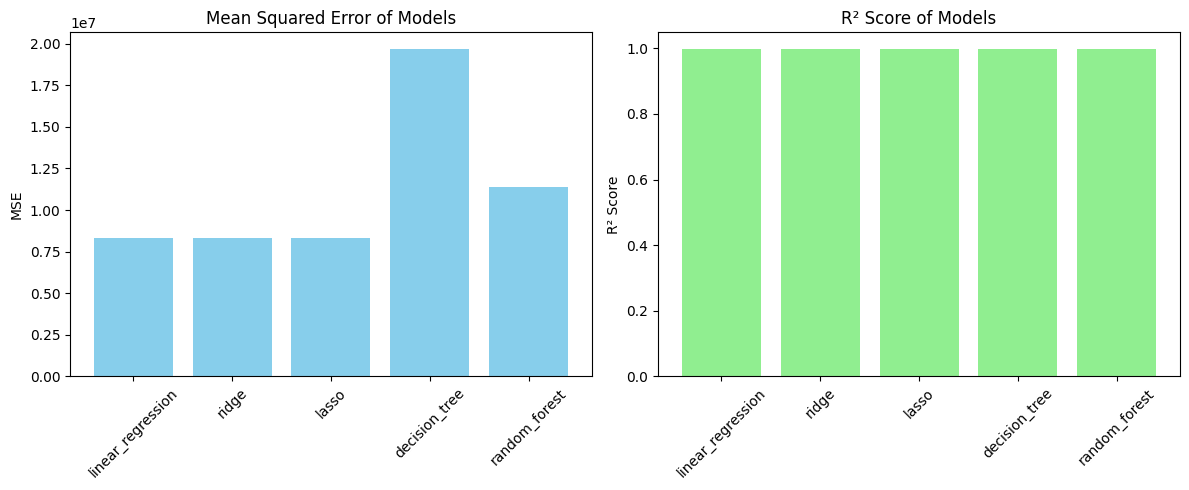

In [18]:
import matplotlib.pyplot as plt

# Plot Mean Squared Error
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(mse_results.keys(), mse_results.values(), color='skyblue')
plt.title('Mean Squared Error of Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot R² Score
plt.subplot(1, 2, 2)
plt.bar(r2_results.keys(), r2_results.values(), color='lightgreen')
plt.title('R² Score of Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


linear_regression: 8322688.32
ridge: 8320060.23
lasso: 8321958.04
decision_tree: 19699226.91
random_forest: 11367262.94


In [17]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    mean_squared_log_error,
    explained_variance_score
)

model=Ridge()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
msle=mean_squared_log_error(y_test,y_pred)
evs=explained_variance_score(y_test,y_pred)

results={
    'mae':mae,
    'mse':mse,
    'r2':r2,
    'mape':mape,
    'msle':msle,
    'evs':evs
}

for metric,value in results.items():
    print(f'{metric}:{value}')


mae:2313.583199375706
mse:8320060.233209482
r2:0.9990107422757434
mape:0.016339385611283577
msle:0.0006284073962058948
evs:0.9990114636449368


Ridge model saved successfully as ridge_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>